In [1]:
import sys

import numpy as np

sys.path.append('..')
from lib.maze import Maze
from lib.cell import Cell

### Define the initial green cells

In [2]:
initial_green_cells = [
  (1, 4),
  (2, 2), (2, 4), (2, 5),
  (3, 1), (3, 2), (3, 5), (3, 6),
  (4, 2), (4, 4), (4, 5),
  (5, 4),
]

### Create the maze and show it

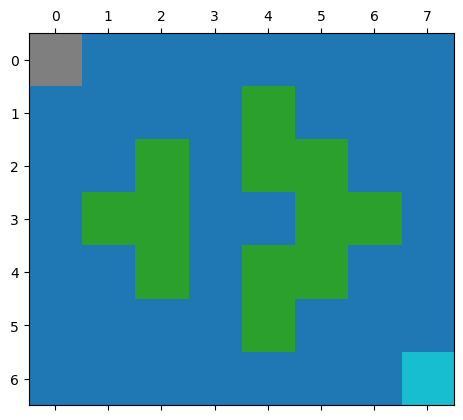

In [3]:
matrix = np.zeros(shape = (7,8), dtype = int)

matrix[0, 0] = Cell.START
matrix[-1, -1] = Cell.FINISH

for pos in initial_green_cells:
  matrix[pos] = Cell.GREEN

maze = Maze(matrix)
maze.draw()

### Search for a random solution

In [4]:
random_path = maze.solve_random(verbose = True, tries = 100)

step: 1, paths: 100, shortest distance to finish: 8.48528137423857
step: 2, paths: 100, shortest distance to finish: 7.810249675906654
step: 3, paths: 100, shortest distance to finish: 7.0710678118654755
step: 4, paths: 100, shortest distance to finish: 6.4031242374328485
step: 5, paths: 100, shortest distance to finish: 6.324555320336759
step: 6, paths: 100, shortest distance to finish: 6.082762530298219
step: 7, paths: 100, shortest distance to finish: 7.0710678118654755
step: 8, paths: 100, shortest distance to finish: 6.082762530298219
step: 9, paths: 100, shortest distance to finish: 5.830951894845301
step: 10, paths: 98, shortest distance to finish: 7.0
step: 11, paths: 98, shortest distance to finish: 6.324555320336759
step: 12, paths: 98, shortest distance to finish: 7.0
step: 13, paths: 98, shortest distance to finish: 6.324555320336759
step: 14, paths: 98, shortest distance to finish: 5.385164807134504
step: 15, paths: 66, shortest distance to finish: 7.0710678118654755
step:

/home/luan/Projetos/stone-automata-maze-challenge/notebooks/../lib/maze.py:132: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  axes_image = plt.matshow(self.maze, cmap = 'tab10')


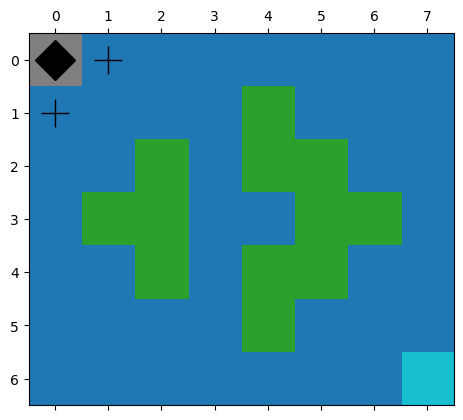

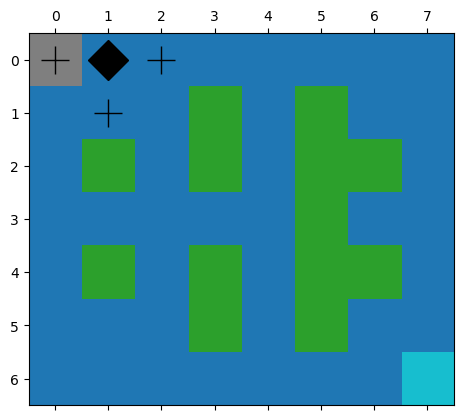

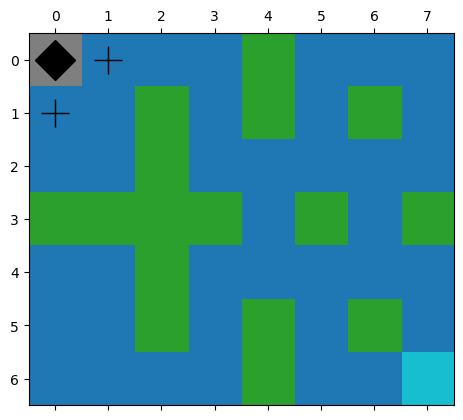

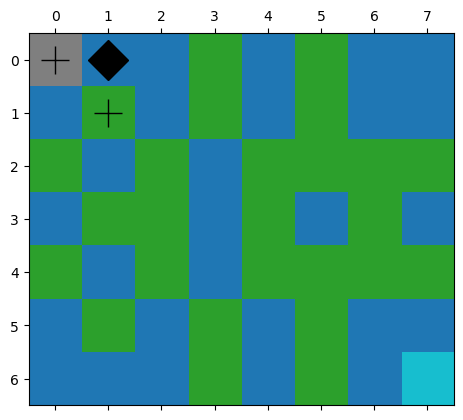

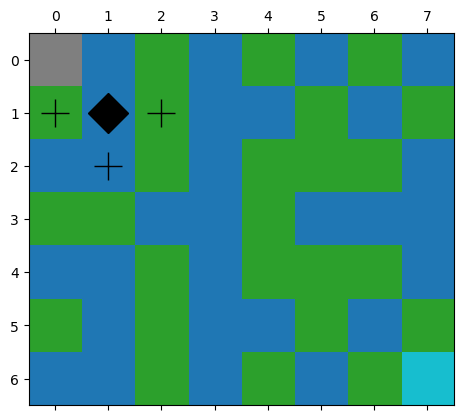

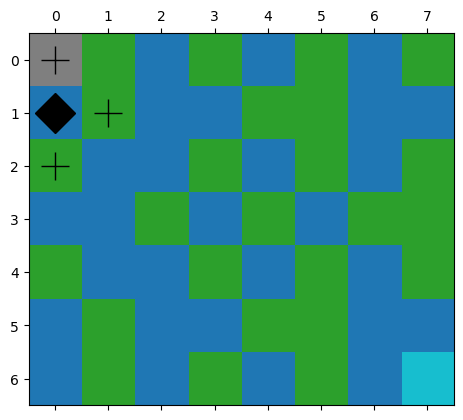

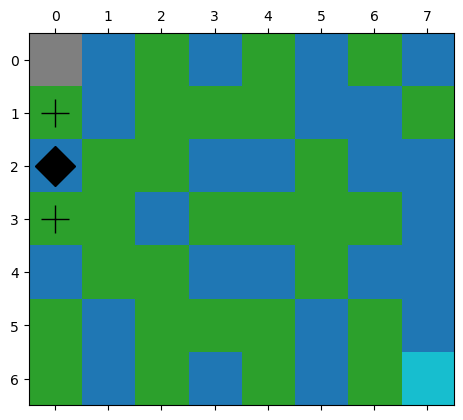

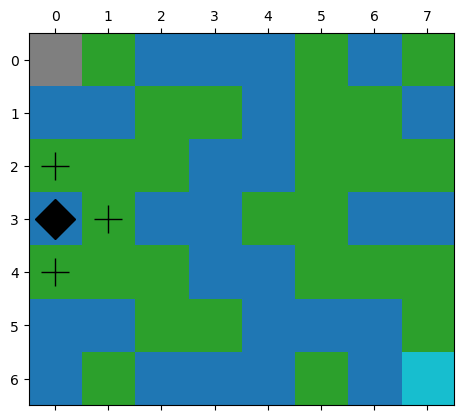

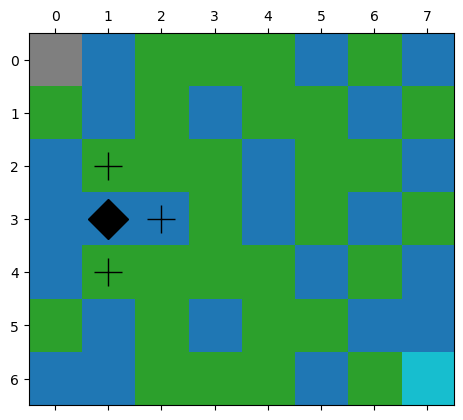

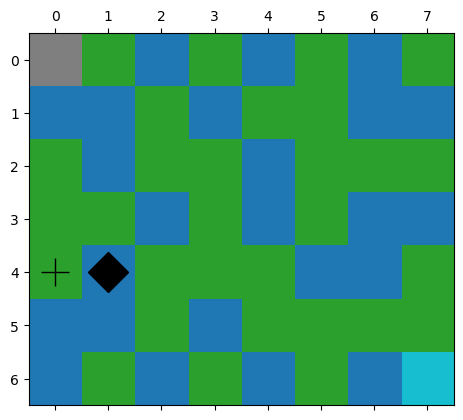

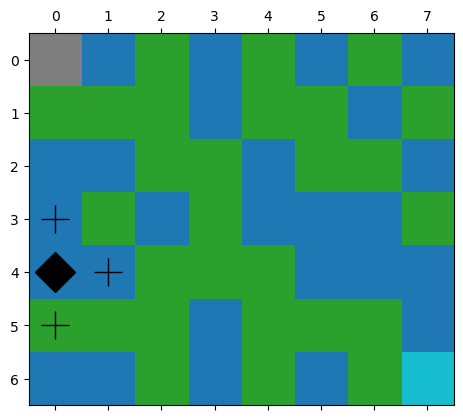

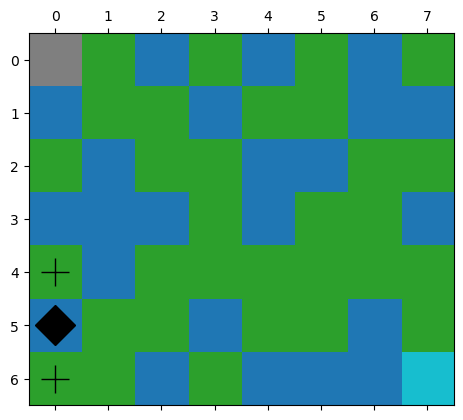

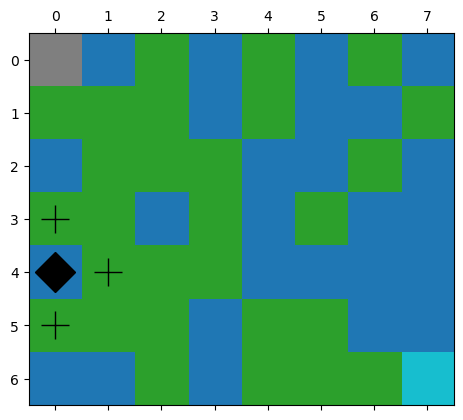

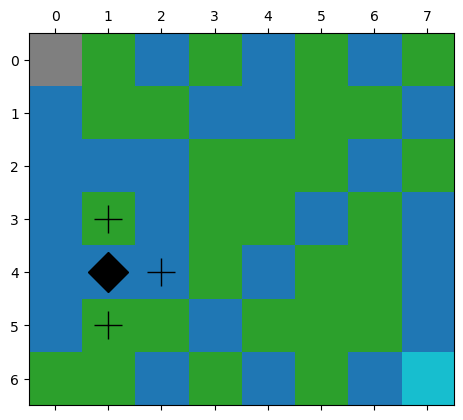

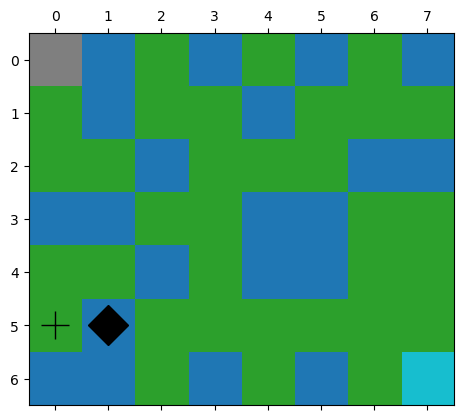

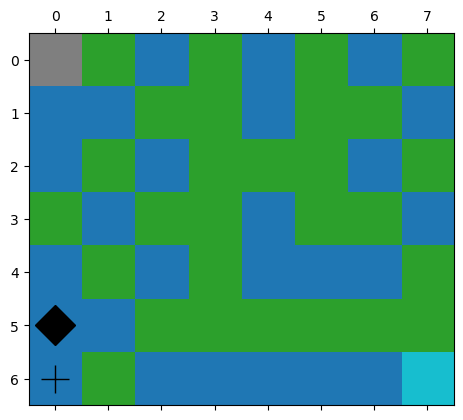

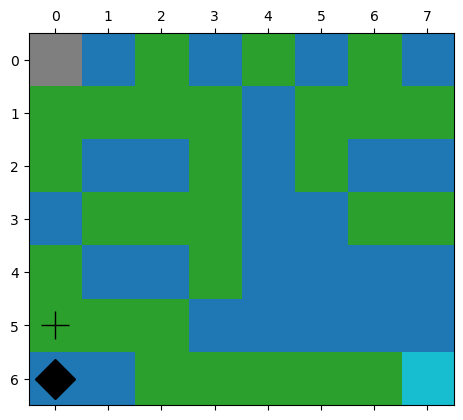

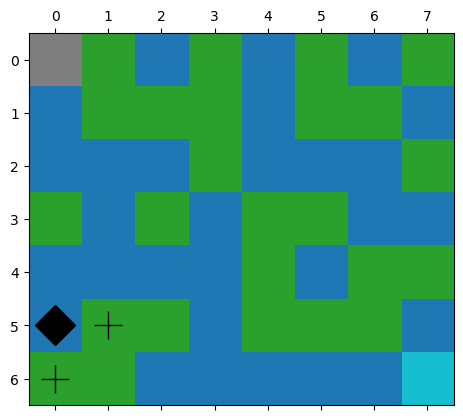

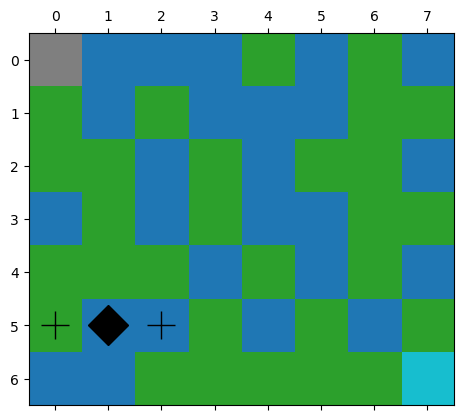

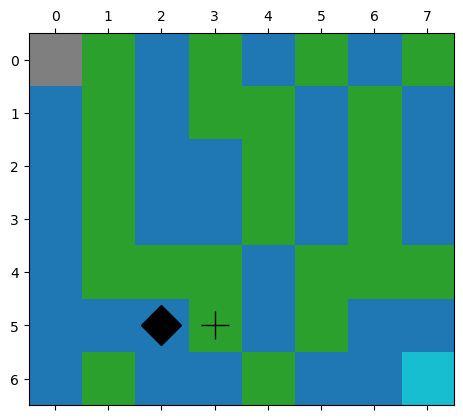

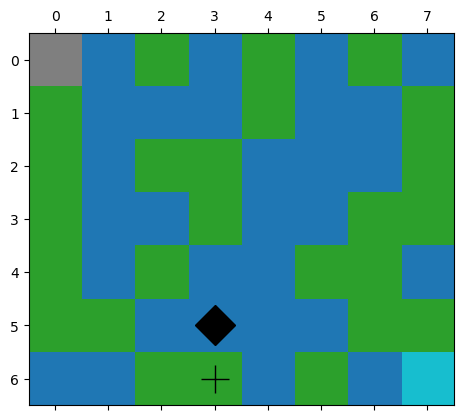

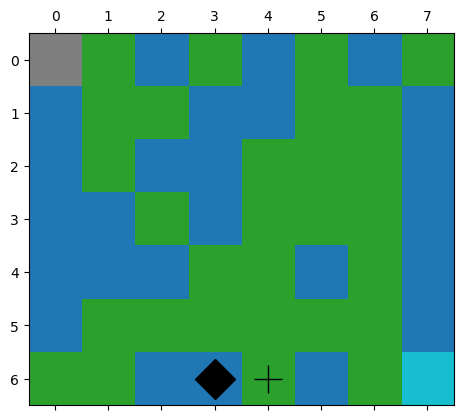

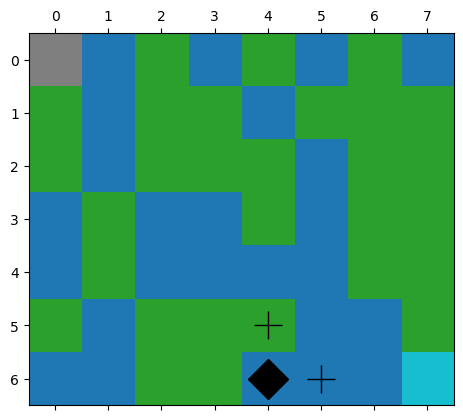

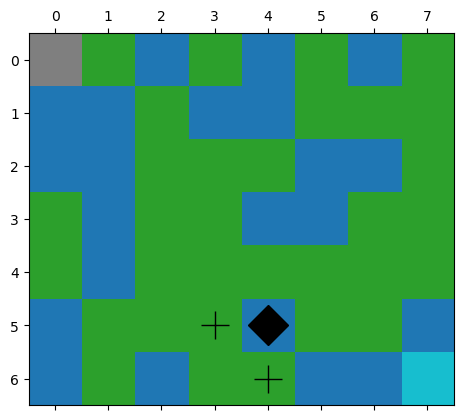

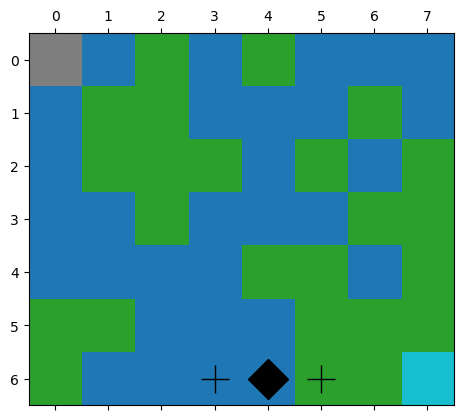

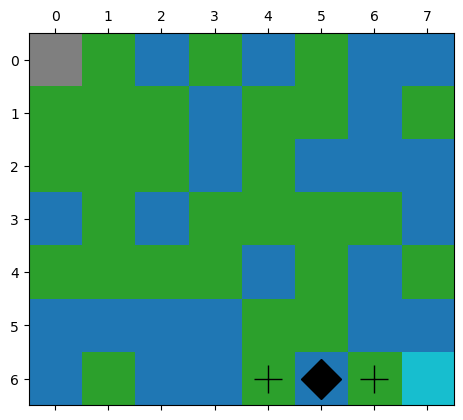

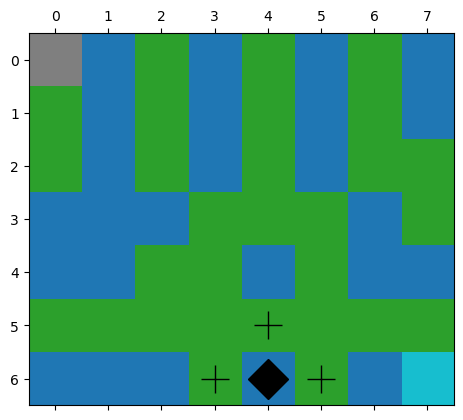

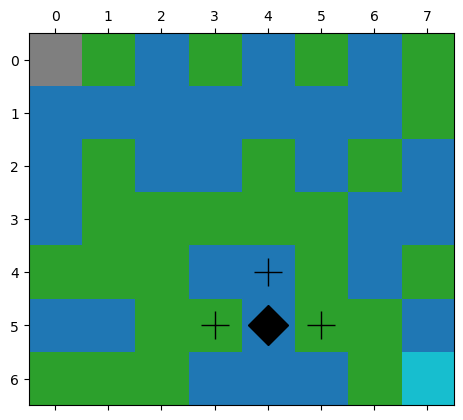

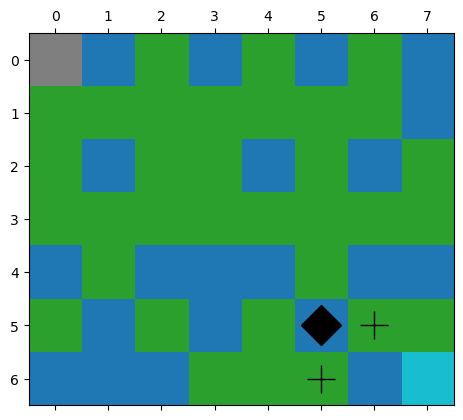

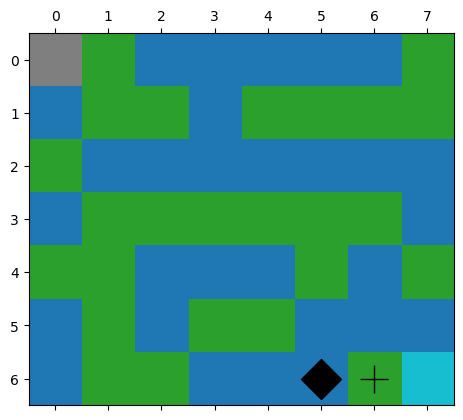

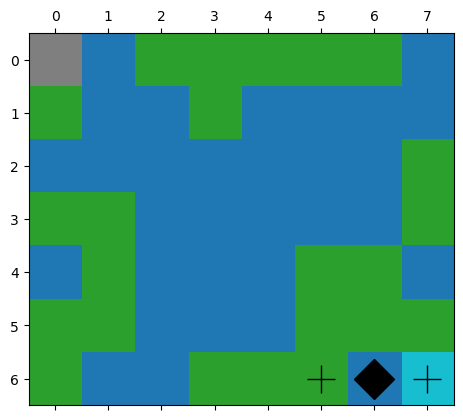

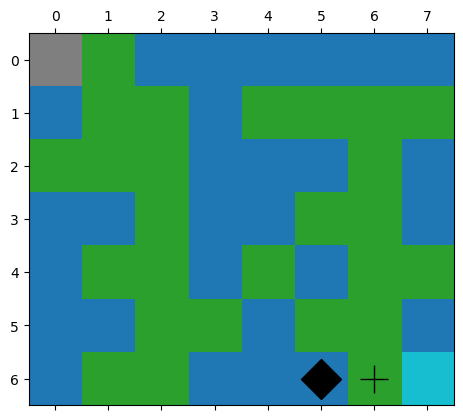

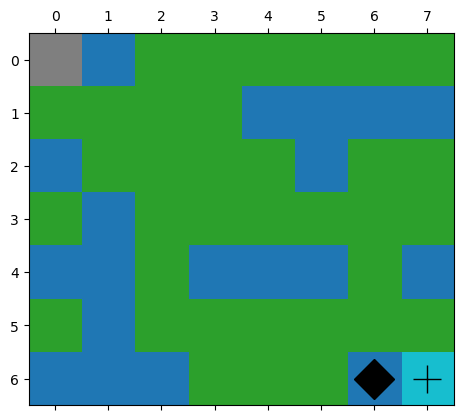

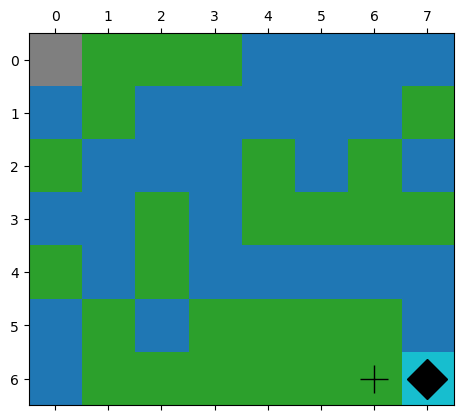

In [5]:
if random_path:
  cp = maze.clone()
  for position in random_path:
    cp.draw(position)
    cp.evolve()

### Find the exact solution

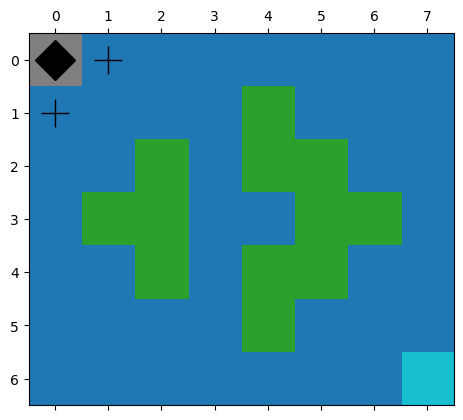

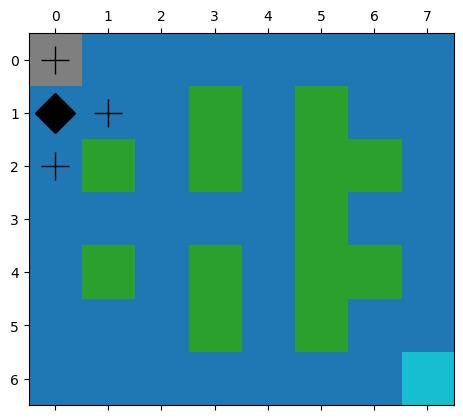

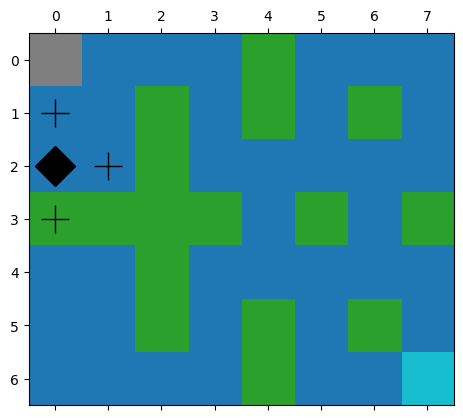

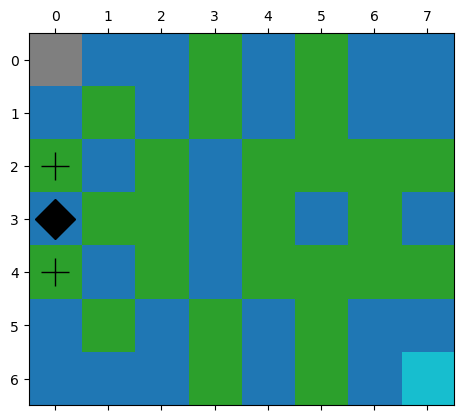

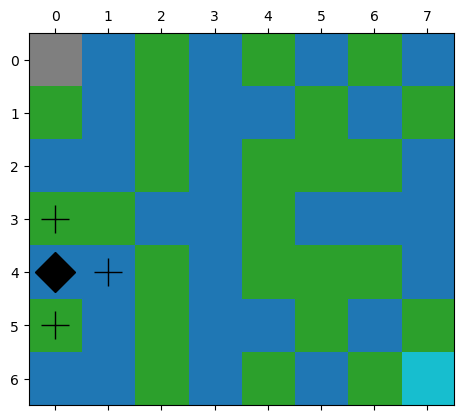

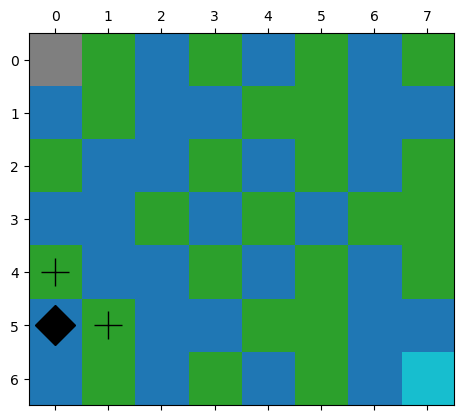

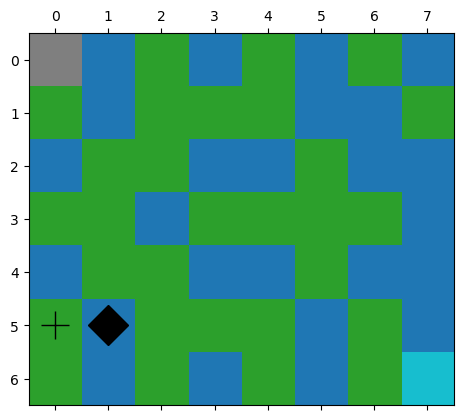

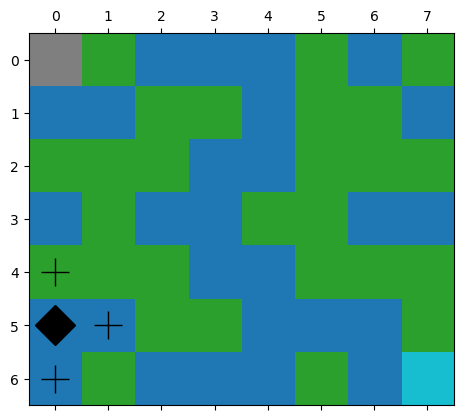

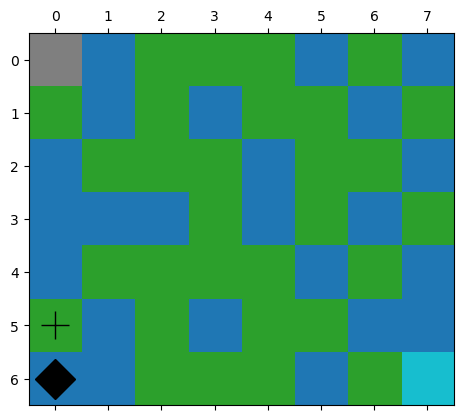

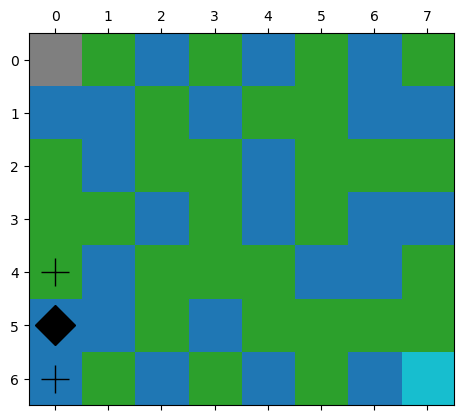

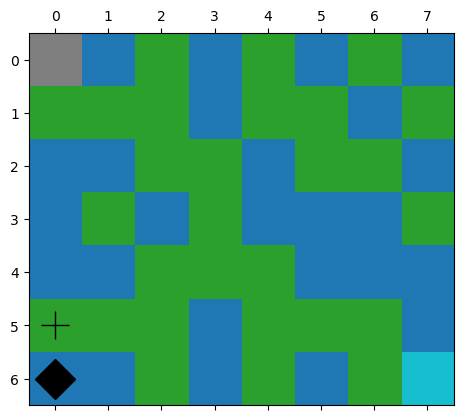

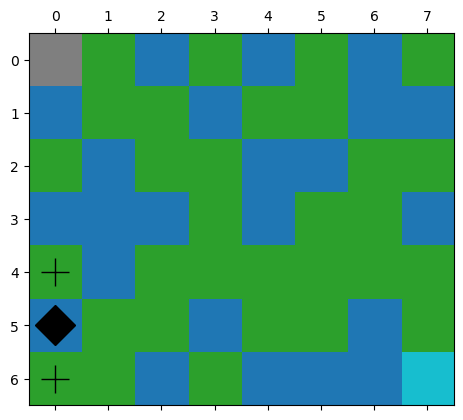

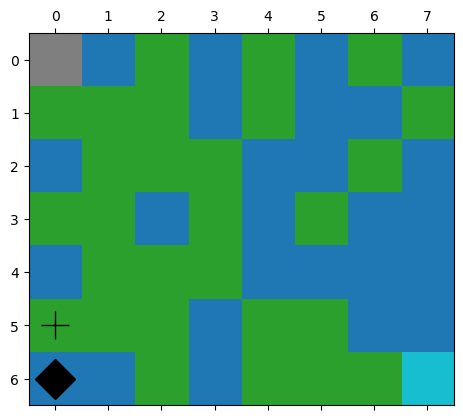

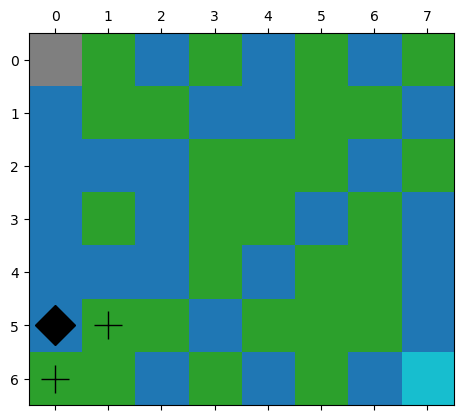

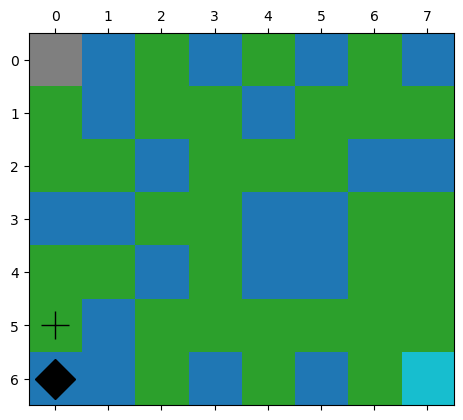

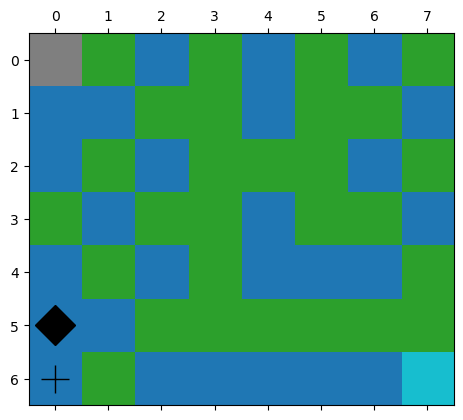

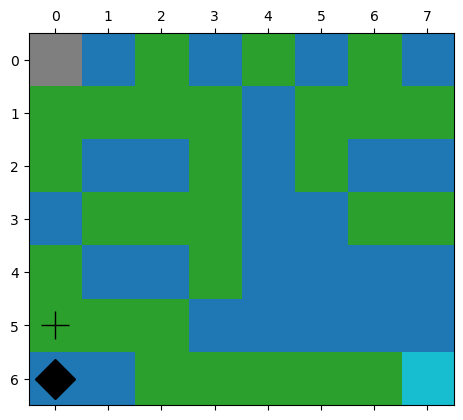

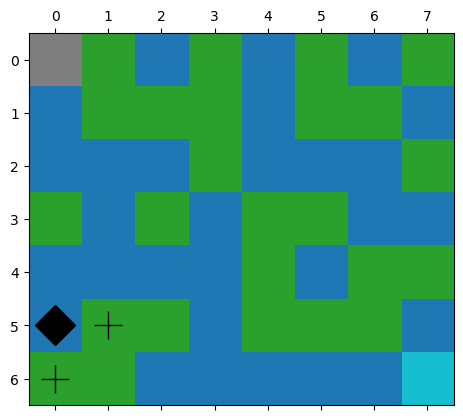

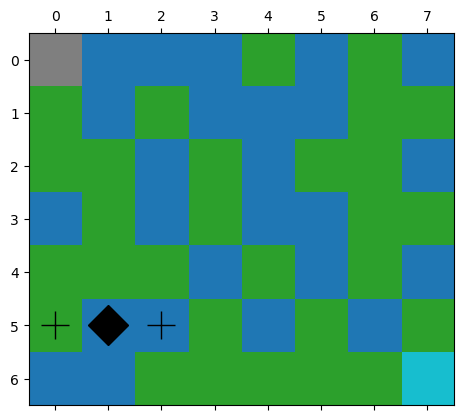

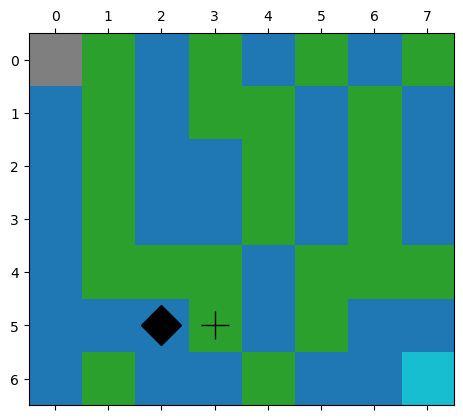

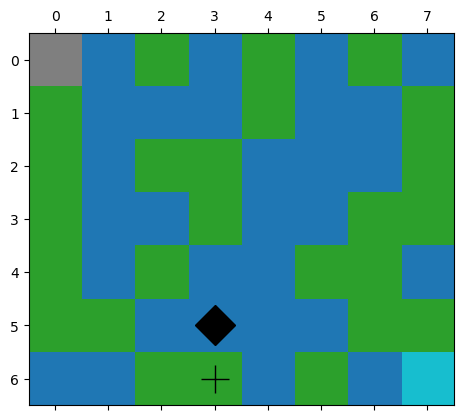

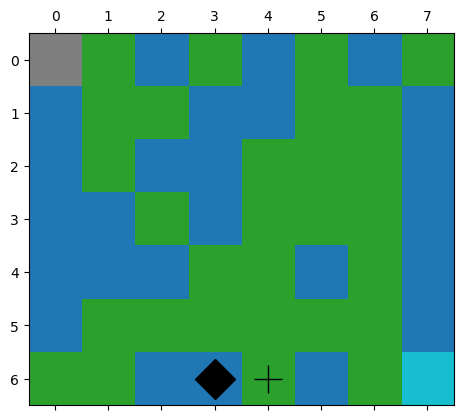

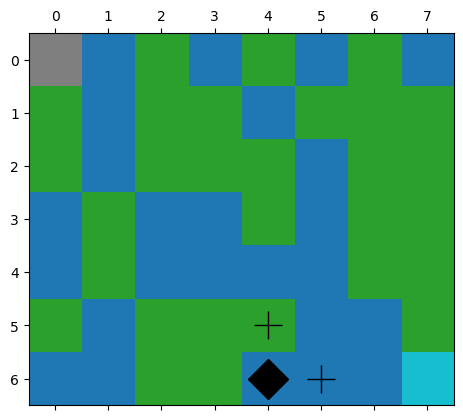

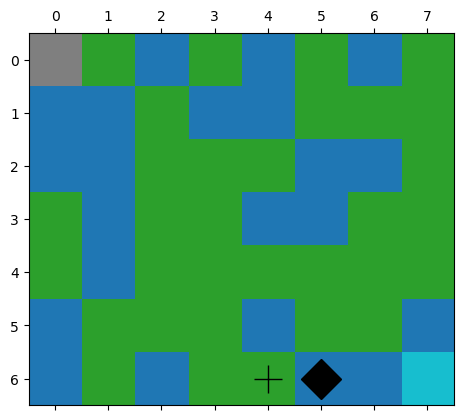

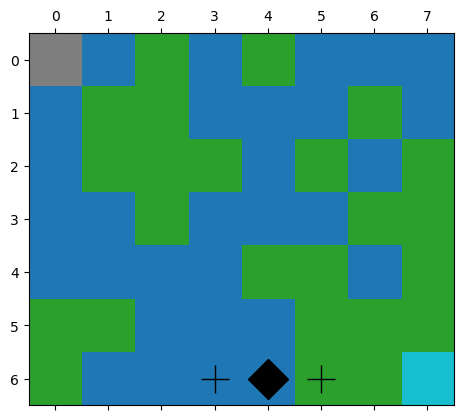

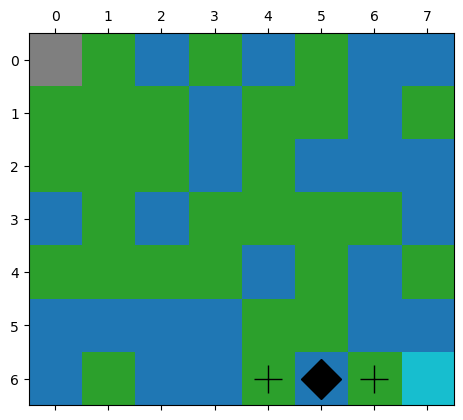

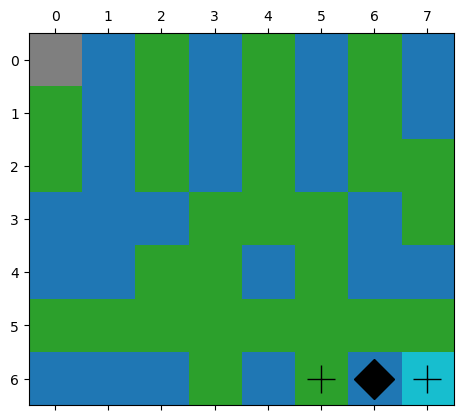

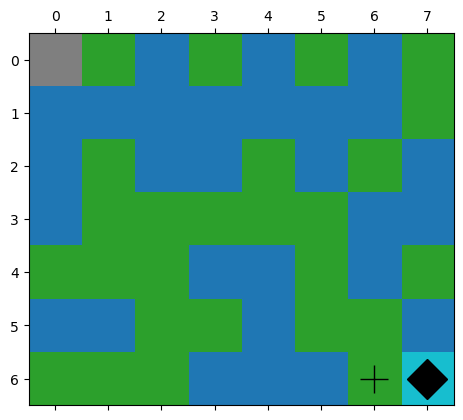

In [6]:
cp = maze.clone()

for position in maze.solve():
  cp.draw(position)
  cp.evolve()